In [39]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import sklearn

In [5]:
import numpy as np

In [7]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


Q1. Downloading the data
We'll use the same NYC taxi dataset, but instead of "Green Taxi Trip Records", we'll use "Yellow Taxi Trip Records".

Download the data for January and February 2023.

Read the data for January. How many columns are there?

16
17
18
19

In [8]:
len(df.columns)

19

Answer: 19

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [10]:
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)

In [11]:
df['dropoff_mins'] = df.tpep_dropoff_datetime.dt.hour * 60 + df.tpep_dropoff_datetime.dt.minute + \
(df.tpep_dropoff_datetime.dt.second / 60)

df['pick_mins'] = df.tpep_pickup_datetime.dt.hour * 60 + df.tpep_pickup_datetime.dt.minute + \
(df.tpep_pickup_datetime.dt.second / 60)

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,dropoff_mins,pick_mins
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,40.600000,32.166667
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,61.450000,55.133333
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,37.816667,25.066667
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,13.416667,3.800000
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,21.316667,10.483333


In [12]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime

In [13]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,dropoff_mins,pick_mins,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,0.5,0.00,0.0,1.0,14.30,2.5,0.00,40.600000,32.166667,0 days 00:08:26
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,0.5,4.00,0.0,1.0,16.90,2.5,0.00,61.450000,55.133333,0 days 00:06:19
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,0.5,15.00,0.0,1.0,34.90,2.5,0.00,37.816667,25.066667,0 days 00:12:45
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,0.5,0.00,0.0,1.0,20.85,0.0,1.25,13.416667,3.800000,0 days 00:09:37
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,0.5,3.28,0.0,1.0,19.68,2.5,0.00,21.316667,10.483333,0 days 00:10:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,...,0.5,3.96,0.0,1.0,23.76,NaN,NaN,12.550000,1438.566667,0 days 00:13:59
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,...,0.5,2.64,0.0,1.0,29.07,NaN,NaN,1430.600000,1411.150000,0 days 00:19:27
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,...,0.5,5.32,0.0,1.0,26.93,NaN,NaN,1405.600000,1381.083333,0 days 00:24:31
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,...,0.5,4.43,0.0,1.0,26.58,NaN,NaN,1433.000000,1420.000000,0 days 00:13:00


In [15]:
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [16]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,dropoff_mins,pick_mins,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,0.5,0.00,0.0,1.0,14.30,2.5,0.00,40.600000,32.166667,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,0.5,4.00,0.0,1.0,16.90,2.5,0.00,61.450000,55.133333,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,0.5,15.00,0.0,1.0,34.90,2.5,0.00,37.816667,25.066667,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,0.5,0.00,0.0,1.0,20.85,0.0,1.25,13.416667,3.800000,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,0.5,3.28,0.0,1.0,19.68,2.5,0.00,21.316667,10.483333,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,...,0.5,3.96,0.0,1.0,23.76,NaN,NaN,12.550000,1438.566667,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,...,0.5,2.64,0.0,1.0,29.07,NaN,NaN,1430.600000,1411.150000,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,...,0.5,5.32,0.0,1.0,26.93,NaN,NaN,1405.600000,1381.083333,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,...,0.5,4.43,0.0,1.0,26.58,NaN,NaN,1433.000000,1420.000000,13.000000


In [18]:
import seaborn as sns

In [19]:
import matplotlib as plt

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

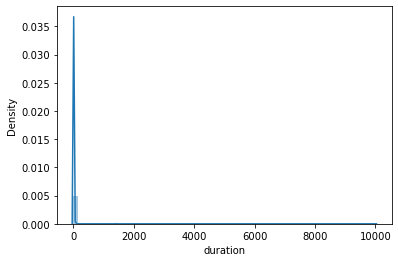

In [20]:
sns.distplot(df.duration)

In [22]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
50%      1.151667e+01
95%      3.646667e+01
98%      4.873333e+01
99%      5.725000e+01
max      1.002918e+04
Name: duration, dtype: float64

Q3. Dropping outliers
Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

90%
92%
95%
98%

In [23]:
((df.duration  >= 1) & (df.duration <= 60)).mean()

0.9812202822125979

Answer: 98.12%

In [24]:
std_dev_duration = df['duration'].std()

Q2. Computing duration
Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the standard deviation of the trips duration in January?

32.59
42.59
52.59
62.59

In [25]:
print(f"The standard deviation of trip durations in January is: {std_dev_duration:.2f} minutes")

The standard deviation of trip durations in January is: 42.59 minutes


Answer: 42.59

In [26]:
categorical = ['PULocationID', 'DOLocationID']

In [30]:
df[categorical] = df[categorical].astype(str)

In [31]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dropoff_mins                    float64
pick_mins                       float64
duration                        float64
dtype: object

In [33]:
from sklearn.feature_extraction import DictVectorizer

In [35]:
train_dicts = df[categorical].to_dict(orient='records')

In [36]:
dv = DictVectorizer()

In [37]:
X_train = dv.fit_transform(train_dicts)

In [38]:
X_train

<3066766x518 sparse matrix of type '<class 'numpy.float64'>'
	with 6133532 stored elements in Compressed Sparse Row format>

In [40]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=105',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',

In [ ]:
num_columns = X_train.shape[1]

Q4. One-hot encoding
Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
Fit a dictionary vectorizer
Get a feature matrix from it
What's the dimensionality of this matrix (number of columns)?

2
155
345
515
715

In [42]:
print(f"Number of columns in X_train: {num_columns}")

Number of columns in X_train: 518


Answer: 515

In [43]:
target = 'duration'
y_train = df[target].values

In [44]:
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = lr.predict(X_train)

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
mean_squared_error(y_train, y_pred, squared=False)

41.99649230697964

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns


/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


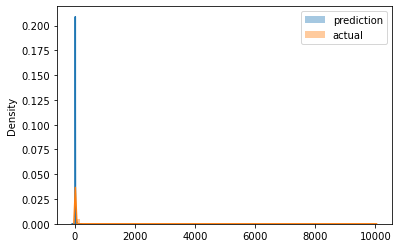

In [52]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
mean_squared_error(y_train, y_pred, squared=False)

41.99649230697964

In [55]:
mse = 41.99649230697964

In [56]:
rmse = np.sqrt(mse)

Q5. Training a model
Now let's use the feature matrix from the previous step to train a model.

Train a plain linear regression model with default parameters, where duration is the response variable
Calculate the RMSE of the model on the training data
What's the RMSE on train?

3.64
7.64
11.64
16.64

In [57]:
print(f"RMSE: {rmse:.2f}")

RMSE: 6.48


Answer: 7.64

In [58]:
df_val = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [61]:
df_val

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.40,3.50,0.5,0.00,0.0,1.0,9.40,2.5,0.00
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,-3.00,-1.00,-0.5,0.00,0.0,-1.0,-5.50,0.0,0.00
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,3.00,1.00,0.5,0.00,0.0,1.0,5.50,0.0,0.00
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.90,2.25,0.5,0.00,0.0,1.0,74.65,0.0,1.25
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.00,1.00,0.5,3.30,0.0,1.0,25.30,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913950,2,2023-02-28 23:46:00,2023-03-01 00:05:00,NaN,4.65,NaN,None,249,140,0,20.22,0.00,0.5,4.84,0.0,1.0,29.06,NaN,NaN
2913951,2,2023-02-28 23:26:02,2023-02-28 23:37:10,NaN,2.47,NaN,None,186,79,0,13.66,0.00,0.5,2.65,0.0,1.0,20.31,NaN,NaN
2913952,2,2023-02-28 23:24:00,2023-02-28 23:38:00,NaN,3.49,NaN,None,158,143,0,17.64,0.00,0.5,0.00,0.0,1.0,21.64,NaN,NaN
2913953,2,2023-02-28 23:03:00,2023-02-28 23:10:00,NaN,2.13,NaN,None,79,162,0,13.56,0.00,0.5,2.63,0.0,1.0,20.19,NaN,NaN


In [62]:
val_dicts = df_val[categorical].to_dict(orient='records')

In [63]:
x_val = dv.transform(val_dicts)

In [65]:
df_val.tpep_dropoff_datetime = pd.to_datetime(df_val.tpep_dropoff_datetime)
df_val.tpep_pickup_datetime = pd.to_datetime(df_val.tpep_pickup_datetime)

In [66]:
df_val['dropoff_mins'] = df_val.tpep_dropoff_datetime.dt.hour * 60 + df_val.tpep_dropoff_datetime.dt.minute + \
(df_val.tpep_dropoff_datetime.dt.second / 60)

df_val['pick_mins'] = df_val.tpep_pickup_datetime.dt.hour * 60 + df_val.tpep_pickup_datetime.dt.minute + \
(df_val.tpep_pickup_datetime.dt.second / 60)

df_val.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,dropoff_mins,pick_mins
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,...,3.50,0.5,0.0,0.0,1.0,9.40,2.5,0.00,34.566667,32.883333
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,...,-1.00,-0.5,0.0,0.0,-1.0,-5.50,0.0,0.00,35.500000,35.266667
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,...,1.00,0.5,0.0,0.0,1.0,5.50,0.0,0.00,35.500000,35.266667
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,...,2.25,0.5,0.0,0.0,1.0,74.65,0.0,1.25,61.633333,29.550000
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,...,1.00,0.5,3.3,0.0,1.0,25.30,2.5,0.00,25.766667,12.466667


In [67]:
df_val['duration'] = df_val.tpep_dropoff_datetime - df_val.tpep_pickup_datetime

In [68]:
df_val

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,dropoff_mins,pick_mins,duration
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,...,0.5,0.00,0.0,1.0,9.40,2.5,0.00,34.566667,32.883333,0 days 00:01:41
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,...,-0.5,0.00,0.0,-1.0,-5.50,0.0,0.00,35.500000,35.266667,0 days 00:00:14
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,...,0.5,0.00,0.0,1.0,5.50,0.0,0.00,35.500000,35.266667,0 days 00:00:14
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,...,0.5,0.00,0.0,1.0,74.65,0.0,1.25,61.633333,29.550000,0 days 00:32:05
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,...,0.5,3.30,0.0,1.0,25.30,2.5,0.00,25.766667,12.466667,0 days 00:13:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913950,2,2023-02-28 23:46:00,2023-03-01 00:05:00,NaN,4.65,NaN,None,249,140,0,...,0.5,4.84,0.0,1.0,29.06,NaN,NaN,5.000000,1426.000000,0 days 00:19:00
2913951,2,2023-02-28 23:26:02,2023-02-28 23:37:10,NaN,2.47,NaN,None,186,79,0,...,0.5,2.65,0.0,1.0,20.31,NaN,NaN,1417.166667,1406.033333,0 days 00:11:08
2913952,2,2023-02-28 23:24:00,2023-02-28 23:38:00,NaN,3.49,NaN,None,158,143,0,...,0.5,0.00,0.0,1.0,21.64,NaN,NaN,1418.000000,1404.000000,0 days 00:14:00
2913953,2,2023-02-28 23:03:00,2023-02-28 23:10:00,NaN,2.13,NaN,None,79,162,0,...,0.5,2.63,0.0,1.0,20.19,NaN,NaN,1390.000000,1383.000000,0 days 00:07:00


In [69]:
df_val.duration = df_val.duration.apply(lambda td: td.total_seconds() / 60)

In [70]:
df_val

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,dropoff_mins,pick_mins,duration
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,...,0.5,0.00,0.0,1.0,9.40,2.5,0.00,34.566667,32.883333,1.683333
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,...,-0.5,0.00,0.0,-1.0,-5.50,0.0,0.00,35.500000,35.266667,0.233333
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,...,0.5,0.00,0.0,1.0,5.50,0.0,0.00,35.500000,35.266667,0.233333
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,...,0.5,0.00,0.0,1.0,74.65,0.0,1.25,61.633333,29.550000,32.083333
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,...,0.5,3.30,0.0,1.0,25.30,2.5,0.00,25.766667,12.466667,13.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913950,2,2023-02-28 23:46:00,2023-03-01 00:05:00,NaN,4.65,NaN,None,249,140,0,...,0.5,4.84,0.0,1.0,29.06,NaN,NaN,5.000000,1426.000000,19.000000
2913951,2,2023-02-28 23:26:02,2023-02-28 23:37:10,NaN,2.47,NaN,None,186,79,0,...,0.5,2.65,0.0,1.0,20.31,NaN,NaN,1417.166667,1406.033333,11.133333
2913952,2,2023-02-28 23:24:00,2023-02-28 23:38:00,NaN,3.49,NaN,None,158,143,0,...,0.5,0.00,0.0,1.0,21.64,NaN,NaN,1418.000000,1404.000000,14.000000
2913953,2,2023-02-28 23:03:00,2023-02-28 23:10:00,NaN,2.13,NaN,None,79,162,0,...,0.5,2.63,0.0,1.0,20.19,NaN,NaN,1390.000000,1383.000000,7.000000


In [71]:
val_dicts = df_val[categorical].to_dict(orient='records')

In [72]:
x_val = dv.transform(val_dicts)

In [74]:
target = 'duration'
y_train = df[target].values
y_val = df_val[target].values

In [76]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(x_val)
mean_squared_error(y_val, y_pred, squared=False)

43.989424715253456

In [77]:
mse = 43.989424715253456

In [78]:
rmse = np.sqrt(mse)

Q6. Evaluating the model
Now let's apply this model to the validation dataset (February 2023).

What's the RMSE on validation?

3.81
7.81
11.81
16.81

In [79]:
print(f"RMSE: {rmse:.2f}")

RMSE: 6.63


Answer: 7.81